<a href="https://colab.research.google.com/github/piyush02nir/Retail-Sales-Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="sky blue"> <h1>**Retail Sales Prediction**</h1></font><hr color="grey">

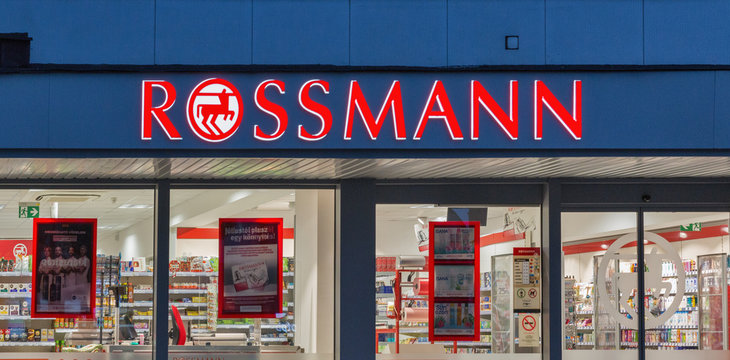

<font color="sky blue"> <h3><b>Business Context</b></h3><hr color="grey"></font>
<font color="sky blue">**Rossmann operates over 3,000 drug stores in 7 European countries**.</font> Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for <font color="sky blue">**1,115 Rossmann stores**.</font> The task is to <font color="sky blue">**forecast the "Sales" column for the test set**</font>. Note that some stores in the dataset were temporarily closed for refurbishment.<hr color="grey">

<font color="sky blue"> <h3><b>Data Description</b></h3><hr color="grey"></font>
We have been provided with 2 data sets.
####<font color="sky blue">**1) Rosemann store Data**:</font> Information about sales and related factors<br>



*   <font color="sky blue">**Store**:</font> Unique Store Id.
*   <font color="sky blue">**DayOfWeek**:</font> No. of day of the week.
*   <font color="sky blue">**Date**:</font> current Date of the day.
*   <font color="sky blue">**Sales**:</font> no. of sales of the day.
*   <font color="sky blue">**Customers**:</font> footfall of the day.
*   <font color="sky blue">**Open**:</font> store is open or closed.
*   <font color="sky blue">**Promo**:</font> Store running promotion or not.
*   <font color="sky blue">**StateHoliday**:</font> state holiday or not.
*   <font color="sky blue">**SchoolHoliday**:</font> school holiday or not.

####<font color="sky blue">**2) Store**:</font> Information about the store
*   <font color="sky blue">**Store**:</font> Unique Store Id.
*   <font color="sky blue">**StoreType**:</font> 4 different type of stores a,b,c,d.
*   <font color="sky blue">**Assortment**:</font> A collection of goods or services that a business provides to a consumer.
*   <font color="sky blue">**CompetitionDistance**:</font>	distance in meters to the nearest competitor store.
*   <font color="sky blue">**CompetitionOpenSinceMonth**:</font> Month in which the competition store was open.
*   <font color="sky blue">**CompetitionOpenSinceYear**:</font> Year in which the competition store was open.
*   <font color="sky blue">**Promo2**:</font> Store running consecutive promotion or not.
*   <font color="sky blue">**Promo2SinceWeek**:</font>	 calendar week when the store started participating in Promo2.
*   <font color="sky blue">**Promo2SinceYear**:</font>	year when the store started participating in Promo2.
*   <font color="sky blue">**PromoInterval**:</font>The month in which the promotion starts eg: Jan,Apr,Jul,Oct.

<hr color="grey">


## <font color = "sky blue">**Following are the 7 major steps of building Machine Learning Model :**
1. Collecting Data.
2. Preparing the Data
   
    * Exploratory Data Analysis.

    * Feature engineering.
3. Choosing a Model
4. Training the Model.
5. Evaluating the Model.
6. Parameter Tuning.
7. Making Predictions.

#<font color = "sky blue"><font color = "sky blue">First thing first importing the necessary libraries for EDA and Machine learning algorithim to train our model.

##Following are the libraries:-

* NumPy
* Pandas
* Matplotlib
* Seaborn
* Scikit Learn

### <font color = "sky blue"><b>Importing all required libraries and setting Jupyter Notebook</b>

In [ ]:
#Importing required libraries
import numpy as np,pandas as pd, matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns, datetime, ast, time, sys, math
import warnings
warnings.filterwarnings('ignore')

#For showing all outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from math import *

#required machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor


In [ ]:
t1 = time.time()
# default='warn'. suppresing unnecessary warnings
pd.options.mode.chained_assignment = None  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

<hr color="grey">

### <font color = "sky blue">**Loading csv files for Rossmann Stores and Store into a DataFrame**

In [ ]:
#mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#<font color = "sky blue">**1.Collecting Data.**

##After mounting the gdrive we are ready to load our dataset.

we have two dataset.which is Rossmann Store data and Store data.In which we have diffrent store observations and its some information like sales store catagories etc.

In [ ]:
#path of the csv files required
df_rossmann = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone_project_II/Rossmann Stores Data.csv')
df_store = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone_project_II/store.csv')

In [ ]:
#Shivank
# df_rossmann = pd.read_csv('/content/drive/MyDrive/retail sales data/Rossmann Stores Data.csv')
# df_store = pd.read_csv('/content/drive/MyDrive/retail sales data/store (3).csv')

<hr color="grey">

# <font color = "sky blue">**2.Preparing the Data**

Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our Rossmann DataFrames.

Using info() method we can easily get the idea of what kind of data type and null values inside our Rossman dataframes we have.

In [ ]:
print('------------------------------------Head---------------------------------------\n')
df_rossmann.head()            #checking 1st 5 rows of the df
print('\n------------------------------------Tail---------------------------------------\n')
df_rossmann.tail()            #checking last 5 rows of the df
print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_rossmann.shape[0]}, Columns: {df_rossmann.shape[1]}\n')   
print('------------------------------------Info--------------------------------------\n')
df_rossmann.info()            #information about the df
print('\n------------------------------------describe--------------------------------------\n')
df_rossmann.describe()        #statictical description of the df
print('\n------------------------------------NUll_Value_count--------------------------------------\n')
df_rossmann.isnull().sum()    #sum of the null values

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1



------------------------------------Tail---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 9

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB

------------------------------------describe--------------------------------------



,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00



------------------------------------NUll_Value_count--------------------------------------



Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

The Rossmann_df has 1017209 number of rows and 9 columns.


<font color="sky blue"><h3>**The data has no null values**</h3>

In [ ]:
#As date column is in object format converting it into Date Time format.
df_rossmann['Date'] = pd.DatetimeIndex(df_rossmann['Date'])

In [ ]:
#as StateHoliday column is in object lets check its unique values 
df_rossmann['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
#replacing string '0' with int 0
df_rossmann['StateHoliday'].replace({'0':0}, inplace=True)

In [ ]:
#checking the data
df_rossmann.iloc[1113:1118] #Store no. repeats on every new date

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1113,1114,5,2015-07-31,27508,3745,1,1,0,1
1114,1115,5,2015-07-31,8680,538,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
1116,2,4,2015-07-30,5567,601,1,1,0,1
1117,3,4,2015-07-30,8977,823,1,1,0,1


In [ ]:
 #counting data for no. of days
val = (df_rossmann['Store'] == 1).sum()
print(f'Total no. of days in the data set are: {val} days')

Total no. of days in the data set are: 942 days


In [ ]:
# Checking if any dates are missing
df_rossmann['Date'].iloc[0] - df_rossmann['Date'].iloc[-1] #last date is not included 

Timedelta('941 days 00:00:00')

<font color = "sky blue"><h4>**No dates are missing in the data**</h4>

In [ ]:
#check the no of the days the store remains closed
val = ((df_rossmann['Open'] == 0 ) & (df_rossmann['Store'] == 1)).sum()
print(f'Total no. of days store remain closed: {val} days')

Total no. of days store remain closed: 161 days


In [ ]:
#seeing max values of sales and customers.
val_1,val_2 = df_rossmann['Sales'].max(),df_rossmann['Customers'].max()
print(f'Maximum sales recorded: {val_1},\nMaxmimum customers recorded: {val_2}')

Maximum sales recorded: 41551,
Maxmimum customers recorded: 7388


In [ ]:
#seeing unique wales for stateholiday and schoolholiday
df_rossmann['StateHoliday'].unique()
print('\n---')
df_rossmann['SchoolHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)


---


array([1, 0])

### <font color = "sky blue">**Outliers detection** </font>

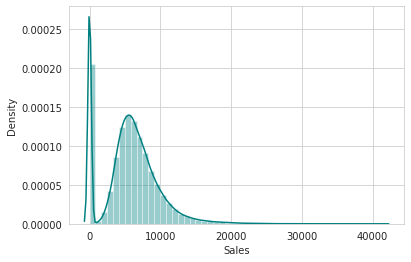

In [ ]:
#checking the distribution plot of the sales column.
sns.distplot(df_rossmann['Sales'].astype(np.int64), color = "teal")

High density of data at 0 sales as there aer days when the shops are closed such as stateholidays and schoolholidays.

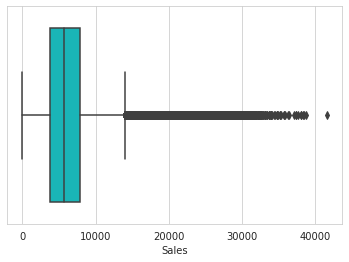

In [ ]:
#checking the box plot of the sales column.
sns.boxplot(df_rossmann['Sales'].astype(np.int64), color = "#00CED1")

In [ ]:
#statistical values to understand data.
val1 = df_rossmann['Sales'].mean()
val2 = df_rossmann['Sales'].median()
val3 = df_rossmann['Sales'].mode()
print(f'For the sales column:\nMean: {val}\nMedian: {val2}\nMode: {val3}')

For the sales column:
Mean: 161
Median: 5744.0
Mode: 0    0
dtype: int64


Binning the data in ranges i.e. 0-5000 low sales, 5000 - 10,000 ,medium sales , 10,000 -20,000 high sales , 20k and above very high sales


<font color = "sky blue"><h3> **Observations:**</h3></font>
*   **Distribution plot for sales column**:

1.   Sales which shows 0 observation is the part where stores were <font color = "sky blue">**closed due to holidays or for refurbishment**.</font>
2.   Maximum Values of the Data lies on the left side of the plot with almost a flat line towars right i.e. the data is <font color = "sky blue">**right skewed**.</font>

*   **Box plot for sales column**:


1.   Maximum Data lies between the <font color = "sky blue">**100% quertile range of 0 - 14,000**.</font>
2.   Outliers are seen after <font color = "sky blue">**14,000.**

*   <font color = "sky blue">**Outliers will not be removed now as the zero sales looks important for further EDA**.</font>

*   The Mean median and mode will change when the 0 sales figures and outliers will be removed. 














<hr color="grey">

### <font color = "sky blue">**Checking data for the store**
Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our Rossmann DataFrames.

Using info() method we can easily get the idea of what kind of data type and null values inside our Rossman dataframes we have.

In [ ]:
print('------------------------------------Head---------------------------------------')
df_store.head()               #checking 1st 5 rows of the df
print('------------------------------------Tail---------------------------------------')
df_store.tail()               #checking last 5 rows of the df
print('------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_store.shape[0]}, Columns: {df_store.shape[1]}\n')
print('------------------------------------Info--------------------------------------\n')
df_store.info()               #information about the df
print('------------------------------------describe--------------------------------------\n')
df_store.describe()           #statictical description of the df
print('------------------------------------NUll_Value_count--------------------------------------\n')
df_store.isnull().sum()       #sum of the null values

------------------------------------Head---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


------------------------------------Tail---------------------------------------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


------------------------------------Shape-------------------------------------

Rows: 1115, Columns: 10

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


------------------------------------NUll_Value_count--------------------------------------



Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

The Store_df has 1115 number of rows and 10 column.

### <font color = "sky blue">**Null Values Treatment**

In [ ]:
(df_store.isnull().sum() / len(df_store) ) * 100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

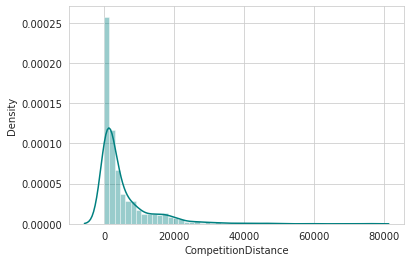

In [ ]:
#find distribution the dataset
sns.distplot(df_store['CompetitionDistance'], color = "teal")

<font color = "sky blue"><h3>**Observation:**</h3>

*    Maximum Values of the Data lies on the left side of the plot with almost a flat line towars right i.e. the data is <font color = "sky blue">**right skewed**.</font>
*   So, the <font color = "sky blue">**Median values will be used to fill the missing values**.</font>



In [ ]:
#check if promo2 is open and week and year are missing
df_store[(df_store['Promo2'] == 1) & (df_store['Promo2SinceYear'].isnull())].count()
print('\n------')
df_store[(df_store['Promo2'] == 1) & (df_store['Promo2SinceWeek'].isnull())].count()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


------


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
# filling competition distance with the median value
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

In [ ]:
# checking if competition dicsance is zero bt error. 
df_store[(df_store['CompetitionDistance'] == 0.0)].shape[0] / 1115

0.0

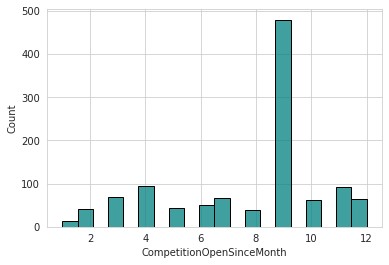

In [ ]:
sns.histplot(df_store['CompetitionOpenSinceMonth'].sort_values(), color = 'Teal', edgecolor = 'black')

In [ ]:
df_store['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])



*   <font color = "sky blue">**CompetitionOpenSinceMonth:**</font> As the dataset contains only 12 values of the month the <font color = "sky blue">**Mode Value will be used to fill the missing values.**</font>
*  <font color = "sky blue">**CompetitionOpenSinceYear:**</font>As the dataset contains values of the year the <font color = "sky blue">**Mode Value will be used to fill the missing values.**







In [ ]:
#find mode of the 2 columns
val1,val2 = df_store['CompetitionOpenSinceMonth'].mode()[0],df_store['CompetitionOpenSinceYear'].mode()[0]
print(f'Mode for CompetitionOpenSinceMonth: {val1} \nMode for CompetitionOpenSinceYear: {val2}  ')

Mode for CompetitionOpenSinceMonth: 9.0 
Mode for CompetitionOpenSinceYear: 2013.0  


In [ ]:
# filling competition open since month and year with modes of those columns
df_store['CompetitionOpenSinceMonth'].fillna(val1, inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(val2, inplace = True)

When the promo2 is zero the Promo2SinceWeek,Promo2SinceYear, PromoInterval can be seen to be NaN.<br>
<font color = "sky blue">**Therefore, replacing NaN values with 0.**

In [ ]:
# inputing the nan values of promo2 related columns with 0
df_store['Promo2SinceWeek'].fillna(value=0,inplace=True)
df_store['Promo2SinceYear'].fillna(value=0,inplace=True)
df_store['PromoInterval'].fillna(value=0,inplace=True)     

In [ ]:
#check
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<hr color="grey">

##  <font color = "sky blue">**Mergeing the two DataFrames**

In [ ]:
#merging the store data on rossmann using right join on store column
df_rms = pd.merge(df_rossmann,df_store, how='inner', on = 'Store') #rms = rossmann Stores

In [ ]:
print('------------------------------------Head---------------------------------------\n')
df_rms.head()               #checking 1st 5 rows of the df
print('\n------------------------------------Tail---------------------------------------\n')
df_rms.tail()               #checking last 5 rows of the df
print('\n------------------------------------Shape-------------------------------------\n')
                            #no. of rows and columns
print(f'Rows: {df_rms.shape[0]}, Columns: {df_rms.shape[1]}\n')

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0



------------------------------------Tail---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 18



Now we have 1017209 numner of rows and 18 columns.

In [ ]:
#Sorting the df in terms of Date and Store 
df_rms.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
#reseting the index as sort_values shuffles the rows 
df_rms.reset_index(drop=True, inplace=True)
print('------------------------------------Head---------------------------------------\n')
df_rms.head(10)#first 3 rows of the df
print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_rms.shape[0]}, Columns: {df_rms.shape[1]}\n') #cheking if any data is missing after the above operations.

------------------------------------Head---------------------------------------



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,0.0,0.0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0



------------------------------------Shape-------------------------------------

Rows: 1017209, Columns: 18



first we have date column we have to separate the date, month and year from that.

In [ ]:
#Getting day from the Date column
df_rms['DayOfYear'] = df_rms['Date'].dt.dayofyear
#Getting week from the Date column
df_rms['WeekOfYear'] = df_rms['Date'].dt.weekofyear
#Getting month from the Date column
df_rms['Month'] = df_rms['Date'].dt.month
#Getting year from the Date column
df_rms['Year'] = df_rms['Date'].dt.year

Now in Assortment column we have to levelized the catagorical value in a form of 0,1,2 which we give some weightage to model predictions.

In [ ]:
df_rms['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

Now in StoreType we did not use One hot encoding because if we done hone encoding which give equal weightage to our model. so as per domain knowledge we can labeled as 0,1,2,3 as store type.

store_type 0 means small store_type.

store_type 1 means medium store_type.

store_type 2 means large store_type.

store_type 3 means huge store_type.

In [ ]:
df_rms['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [ ]:
df_rms['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
##converting catagorical value into interger values based on StateHoliday class.
df_rms["StateHoliday"] = df_rms["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})


In [ ]:
df_rms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

As we can see that many columns our in object datatype so we have to check the datatype of thses column because our machine learning algorithms only takes numberical values.

In [ ]:
#converting object dtype to integer.
df_rms['StateHoliday']= df_rms['StateHoliday'].astype(int)

## <font color = "sky blue">**Hypothesis Testing**


*   Sales should be highest on saturday or sundays due to weekends.
*   sales should have a positive effect after promo.
*   Store store B should have lest sales as it have lest no. of stores.
*   The month of december should have highest no. of sales as it has most no. of public holidays.
*   If the compition distance is close to each other than it should increase the overall sales.







##<font color = "sky blue">**EDA**

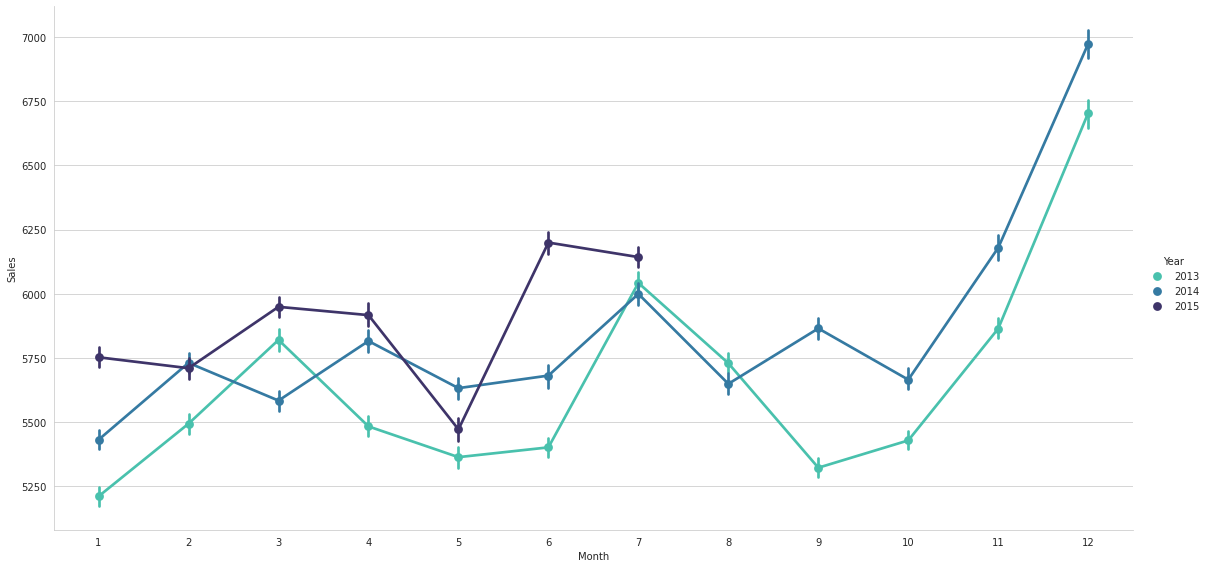

In [ ]:
#monthly sales of every year
sns.catplot( data=df_rms,x="Month", y="Sales", hue="Year", style="Year",kind="point",palette="mako_r", size=8,aspect=2)

###<font color = "Sky blue">**Obesrvation**:


*   Here the  trend shows that the sales increase significantly in the month of October to December due to the holiday season.
*   From the chart we can see that there Are roughly 3 cycle of sales.



[Text(0.5, 1.0, 'Sales according to year ')]

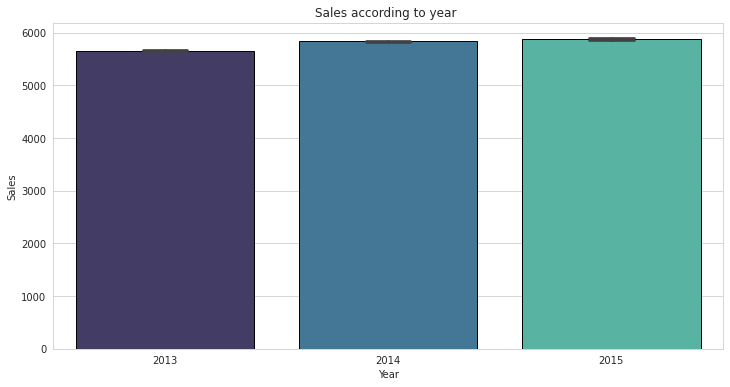

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
year_sales = sns.barplot(data=df_rms,x='Year',y='Sales',palette = "mako",edgecolor = 'black',ax = ax, capsize = .2)
ax.set(title = 'Sales according to year ')
plt.show()


### <font color = "sky blue">**Observation:**

*   From above chart we can see that there is YoY increase in sales from 2013-2015

* Despite having data available for  7 months in year 2015.It has already crossed the sales of 2014.   





### <font color = "sky blue">Week day sales

Text(-0.25, 7170, '\n7170')

Text(0.7500000000000001, 1703, '\n1703')

Text(1.75, 3729, '\n3729')

Text(2.7499999999999996, 11201, '\n11201')

Text(3.7499999999999996, 7205, '\n7205')

Text(4.75, 672, '\n672')

Text(5.75, 141137, '\n141137')

Text(0.14999999999999997, 137560, '\n137560')

Text(1.15, 143961, '\n143961')

Text(2.15, 141936, '\n141936')

Text(3.15, 134644, '\n134644')

Text(4.15, 138640, '\n138640')

Text(5.15, 144058, '\n144058')

Text(6.15, 3593, '\n3593')

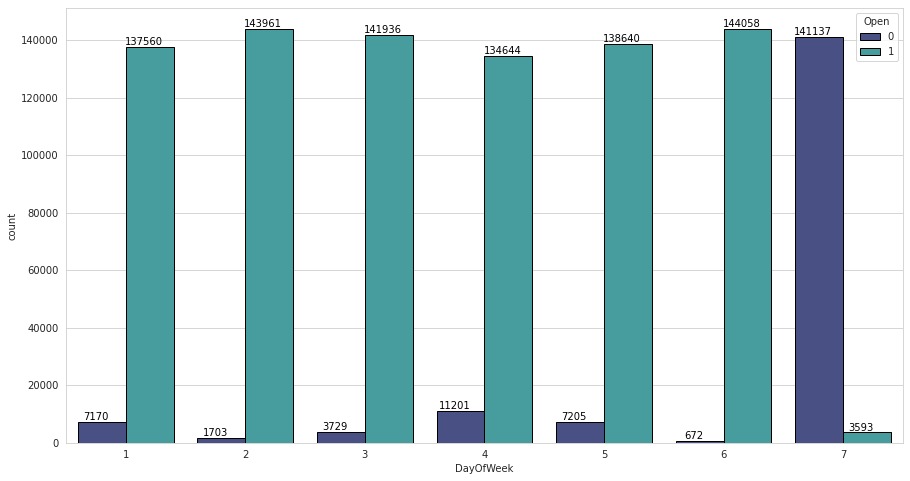

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
count = sns.countplot(x = 'DayOfWeek',hue = 'Open', data = df_rms, palette="mako", edgecolor = 'black')

for p in count.patches:
  count.annotate(f'\n{round(p.get_height(),2)}', (p.get_x() + 0.15, p.get_height()), ha = 'center', va = 'bottom', color = 'Black', size = 10)

### <font color = "sky blue">**Observation:**


*   This plot shows open and close of the shop on days of the week.
*   Here, the store in open for maximum no. of days on Saturday and minimum no. of days Sunday. 



[Text(0.5, 1.0, 'Sales according to Day of week ')]

Text(-0.25, 7809.044510467767, '\n7809.04')

Text(0.75, 7005.244466717926, '\n7005.24')

Text(1.75, 6555.884138262451, '\n6555.88')

Text(2.75, 6247.57591278412, '\n6247.58')

Text(3.75, 6723.27430491275, '\n6723.27')

Text(4.75, 5847.562599322877, '\n5847.56')

Text(5.75, 204.18318938713466, '\n204.18')

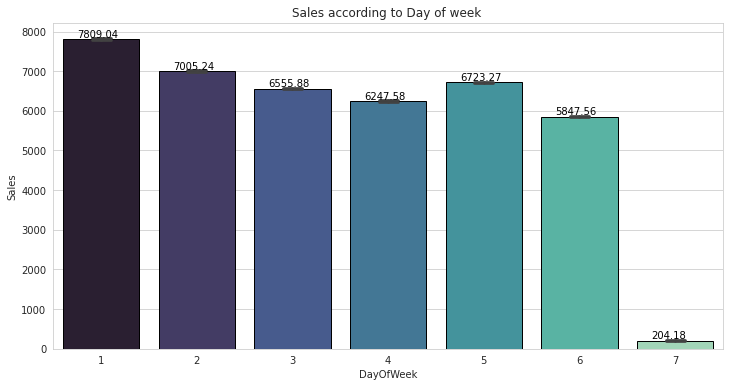

In [ ]:

#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
groupedvalues = df_rms.groupby('Sales').sum().reset_index()
sales = sns.barplot(data = df_rms, x = 'DayOfWeek',y = 'Sales', palette="mako", edgecolor = 'Black', ax = ax, capsize = .2)
ax.set(title = 'Sales according to Day of week ')

for p in sales.patches:
  sales.annotate(f'\n{round(p.get_height(),2)}', (p.get_x() + 0.15, p.get_height()), ha = 'left', va = 'bottom', color = 'Black', size = 10)

plt.show()

### <font color = "sky blue">**Observation:**


*   As sundays has the most store closed so it has the least number of sales
*   On the other hand mondays have the maximum number of sales
*   Despite having the maximum number of stores open still have  third least sales numbers.








###<font color = "sky blue">**Impact of Promo on sales**

Text(-0.25, 4406.050805160786, '\n4406.05')

Text(0.75, 7991.152045969903, '\n7991.15')

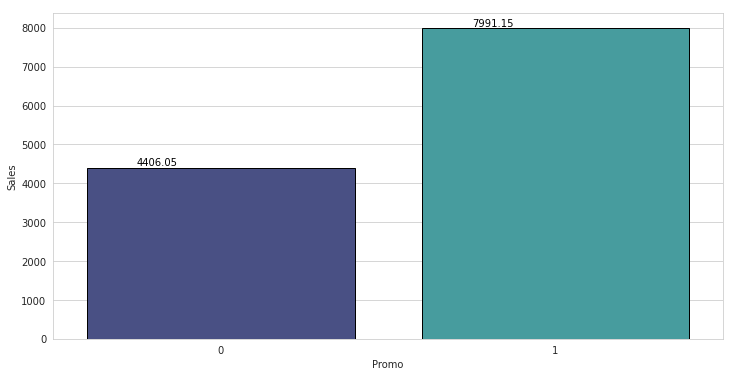

In [ ]:
#Impact of promo on sales
fig,ax=plt.subplots(figsize=(12,6))
Promo_sales = pd.DataFrame(df_rms.groupby('Promo').agg({'Sales':'mean'}))
promo = sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'], palette = 'mako',  edgecolor = 'black')

for p in promo.patches:
  promo.annotate(f'\n{round(p.get_height(),2)}', (p.get_x()+0.15, p.get_height()), ha = 'left', va = 'bottom', color = 'Black', size=10)

### <font color = "sky blue">**Observation:**

*   As we can see that the store who participating in promotion having more sales as compare to other. which means promotion is the key to attract the customer towards the store.

*   The Sales get almost increases by 100 % when promo takes place.

([<matplotlib.patches.Wedge at 0x7f5680740610>,
 [Text(1.0159180704524655, -0.6386786939675845, 'Not-Affected'),
  Text(-0.9312582038409442, 0.5854555130656288, 'Affected')],
 [Text(0.5926188744306049, -0.37256257148109095, '82.1%'),
  Text(-0.5079590202768786, 0.31933937076307023, '17.9%')])

(-1.1045085311776077,
 1.1946791547298579,
 -1.1573233397609766,
 1.0528563411165743)

Text(0.5, 1.0, 'Sales Affected by Schoolholiday or Not ?')

[]

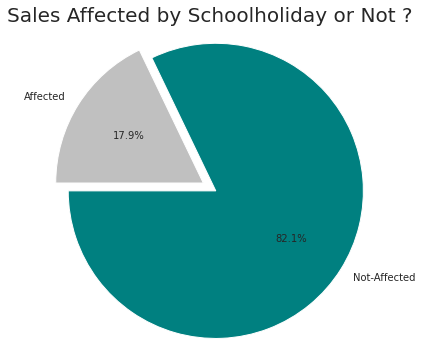

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = df_rms['SchoolHoliday'].value_counts()
colors = ['Teal', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

### <font color = "sky blue">**Observation:**




*   Only 18% Sales are affected during school holiday






In [ ]:
#linear relation between sales and customers
# sns.lmplot(x= 'Sales' , y ='Customers',data=df_rms, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'})

(-1.1198767102389966,
 1.1532648769417027,
 -1.1660286425901127,
 1.1656077384745946)

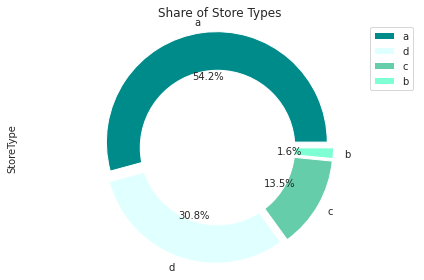

(-1.1198521337704173,
 1.1316560833923897,
 -1.1585424416648198,
 1.1650529391677167)

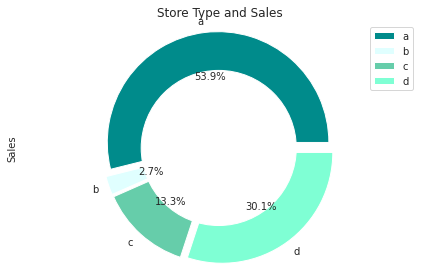

(-1.1175547535190975,
 1.1386091849186242,
 -1.1565641469178023,
 1.163858695983818)

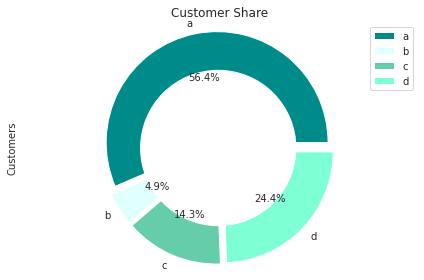

(-1.1524968431263414,
 1.104743633998287,
 -1.1656109621256827,
 1.1561682270552918)

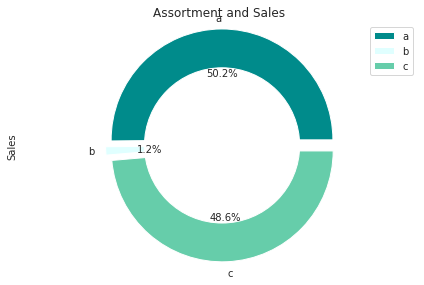

In [ ]:
#colors
colors = ['#008B8B','#E0FFFF','#66CDAA','#7FFFD4']
#explsion
explode = (0.05,0.05,0.05,0.05)

#store types in all of the dataset
plt1 = df_rms["StoreType"].value_counts()
plt1.plot.pie(title='Share of Store Types', legend=True, colors = colors, autopct='%1.1f%%',explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

#store type and sales
plt2 = df_rms.groupby("StoreType")["Sales"].sum()
plt2.plot.pie(title='Store Type and Sales', legend=True, colors = colors, autopct='%1.1f%%',explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

#customers and store type
plt3 = df_rms.groupby("StoreType")["Customers"].sum()
plt3.plot.pie(title='Customer Share', legend=True, colors = colors, autopct='%1.1f%%',explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()


#Assortment and Sales
explode = (0.05,0.05,0.05)
plt4 = df_rms.groupby("Assortment")["Sales"].sum()
plt4.plot.pie(title='Assortment and Sales', legend=True, colors = colors, autopct='%1.1f%%',explode = explode)
# plt.show()
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()


### <font color = "sky blue">**Observation:**

*   Maximum sales are from store a i.e. <font color = "sky blue">**54%**</font>
*   Minimum sales are from store d i.e. <font color = "sky blue">**1.5%**</font>



Text(-0.25, 70878.0, '\n70878.0')

Text(0.75, 346389.0, '\n346389.0')

Text(1.75, 113584.0, '\n113584.0')

Text(2.75, 6594.0, '\n6594.0')

Text(0.016666666666666663, 65962.0, '\n65962.0')

Text(1.0166666666666666, 205238.0, '\n205238.0')

Text(2.0166666666666666, 199328.0, '\n199328.0')

Text(3.0166666666666666, 942.0, '\n942.0')

Text(0.2833333333333333, nan, '\nnan')

Text(1.2833333333333332, nan, '\nnan')

Text(2.283333333333333, nan, '\nnan')

Text(3.283333333333333, 8294.0, '\n8294.0')

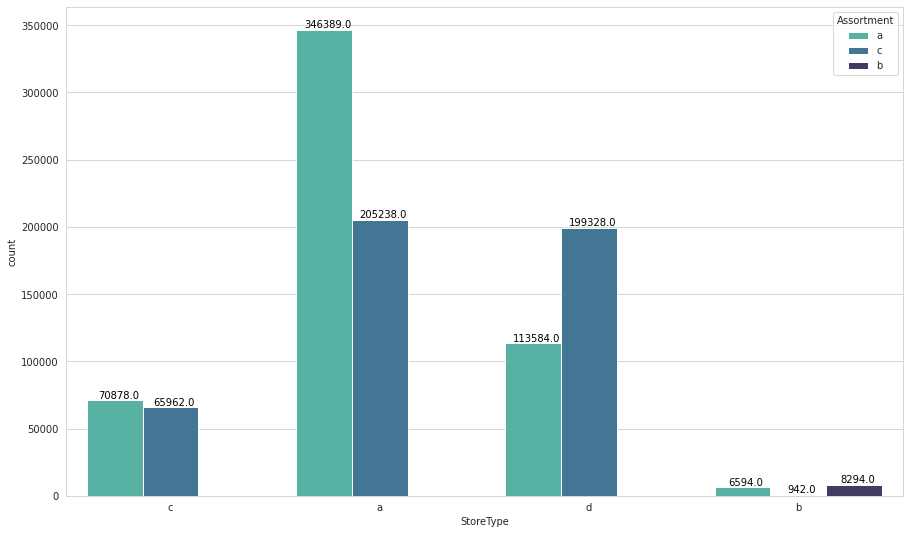

In [ ]:

#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=df_rms, palette="mako_r")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='bottom', color='Black', size=10)

##<font color = "sky blue"> **Now check the distribution of our each features**

Scatter plot for Customer vs Sales

In [ ]:
numeric_features = list(df_rms.describe().columns)

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Scatter plot b/w "Customers" and "Sales"')

Text(0.5, 0, 'Customers')

Text(0, 0.5, 'Sales')

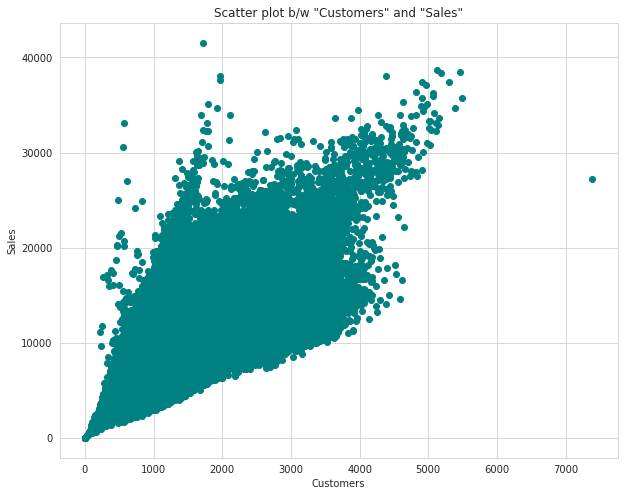

In [ ]:
#scatterplot of Customers and Sales
plt.figure(figsize = (10,8))
x = df_rms['Customers']
y = df_rms['Sales']
plt.scatter(x,y, color = "Teal")
plt.title('Scatter plot b/w "Customers" and "Sales"')
plt.xlabel('Customers')
plt.ylabel('Sales')

### <font color = "sky blue">**Observation:**

*   Positive relation between no. of Customers and Sales.
*   Linear regression with high varience & few outliers.



<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Scatter plot b/w "CompetitionDistance" and "Sales"')

Text(0.5, 0, 'CompetitionDistance')

Text(0, 0.5, 'Sales')

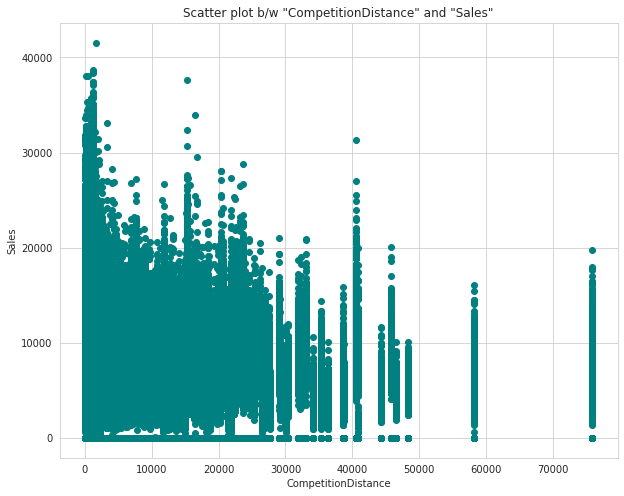

In [ ]:
#scatterplot of Competition Distance and Sales

plt.figure(figsize = (10,8))
x = df_rms['CompetitionDistance']
y = df_rms['Sales']
plt.scatter(x,y, color = 'Teal')
plt.title('Scatter plot b/w "CompetitionDistance" and "Sales"')
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')

### <font color = "sky blue">**Observation:**


*   As the distance between the competition increases the sales decreases.
*   After certain distance (30,000) correlation between CompetitionDistance and Sales is very vague.

In [ ]:
df_rms[df_rms['CompetitionOpenSinceYear'] == 1900].shape[0]
df_rms[df_rms['CompetitionOpenSinceYear'] == 1960].shape[0]

758

0

Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.

<Figure size 1152x648 with 0 Axes>

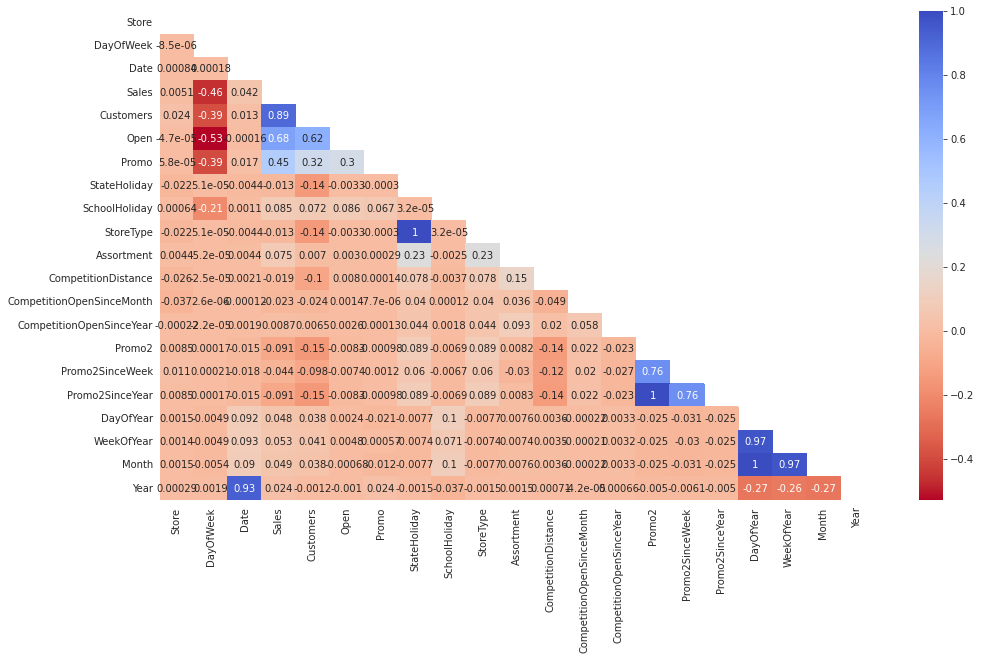

In [ ]:
plt.figure(figsize=(16,9))
mask = np.triu(np.ones_like(df_rms.corr()))
sns.heatmap(df_rms.corr(),annot= True, cmap='coolwarm_r', mask = mask)

### <font color="sky blue">**Possitive Correlation**</font>
Customers and sales has the most positive correlation of **0.84**<br>
Followed by open and Sales with correlation of **0.68**
### <font color="sky blue">**Negative Correlation**</font>
Open and Days of week has most negative correlation of **-0.53**

In [ ]:
df_rms.head()
df_rms.info()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfYear,WeekOfYear,Month,Year
0,1,5,1438300800000000000,5263,555,1,1,2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,212,31,7,2015
1,2,5,1438300800000000000,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",212,31,7,2015
2,3,5,1438300800000000000,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",212,31,7,2015
3,4,5,1438300800000000000,13995,1498,1,1,2,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,212,31,7,2015
4,5,5,1438300800000000000,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0,212,31,7,2015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  int64  
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
# Select all object columns
object_columns = df_rms.select_dtypes(['object'])

# Drop the object columns from the DataFrame
df_s = df_rms.drop(object_columns, axis=1)

# Drop more columns
# df_s.drop(['SchoolHoliday','CompetitionOpenSinceMonth',	'CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','DayOfYear','WeekOfYear','Month','Year','DayOfWeek','Date'], inplace = True, axis = 1)

In [ ]:
df_s.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfYear,WeekOfYear,Month,Year
0,1,5,1438300800000000000,5263,555,1,1,2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,212,31,7,2015
1,2,5,1438300800000000000,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,212,31,7,2015
2,3,5,1438300800000000000,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,212,31,7,2015
3,4,5,1438300800000000000,13995,1498,1,1,2,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,212,31,7,2015
4,5,5,1438300800000000000,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,212,31,7,2015


As the code takes time to execute we have put the photo of the plot with the code given below

In [ ]:
#pairplot for store dataset
# sns.set_style("whitegrid", {'axes.grid' : False})
# pp=sns.pairplot(df_s[['Sales','Customers','Year','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].sample(10000),hue='Sales')
# pp.fig.set_size_inches(15,15)

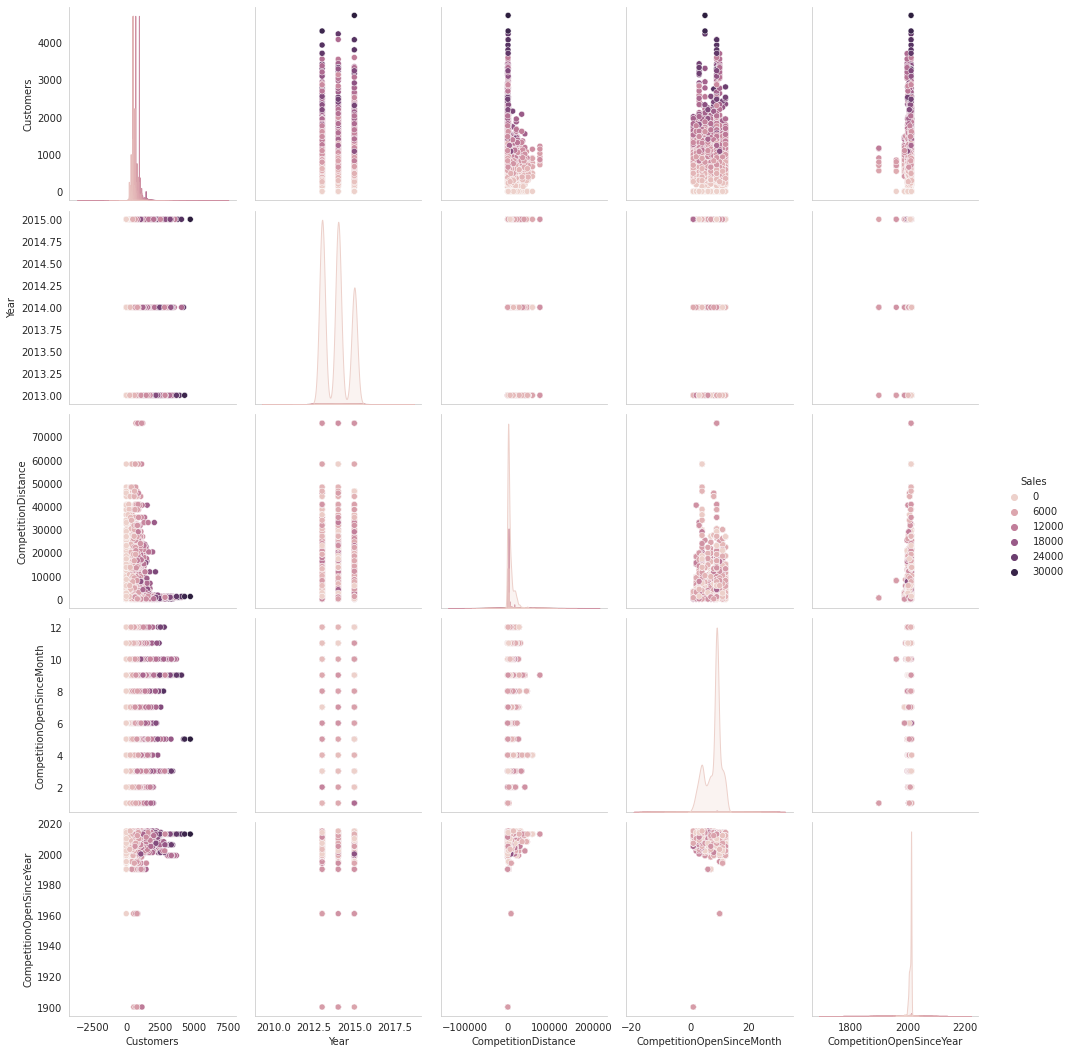

### <font color = "sky blue"><b>Creating Dummy variables</b>

So as we have catagorical values in StoreType and Assortment so we can use pd.getdummies to create dummies variable.

In [ ]:
df_dummy = pd.get_dummies(data = df_rms, columns = ['DayOfWeek','StoreType',	'Assortment'], drop_first = True)

In [ ]:
df_dummy.head()
df_dummy.info()
df_dummy.shape[0], df_dummy.shape[1]

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfYear,WeekOfYear,Month,Year,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_1,StoreType_2,StoreType_3,Assortment_1,Assortment_2
0,1,1438300800000000000,5263,555,1,1,2,1,1270.0,9.0,2008.0,0,0.0,0.0,0,212,31,7,2015,0,0,0,1,0,0,0,1,0,0,0
1,2,1438300800000000000,6064,625,1,1,0,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0
2,3,1438300800000000000,8314,821,1,1,0,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0
3,4,1438300800000000000,13995,1498,1,1,2,1,620.0,9.0,2009.0,0,0.0,0.0,0,212,31,7,2015,0,0,0,1,0,0,0,1,0,0,1
4,5,1438300800000000000,4822,559,1,1,0,1,29910.0,4.0,2015.0,0,0.0,0.0,0,212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   Date                       1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int64  
 7   SchoolHoliday              1017209 non-null  int64  
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  float64
 10  CompetitionOpenSinceYear   1017209 non-null  float64
 11  Promo2                     1017209 non-null  int64  
 12  Promo2SinceWeek            1017209 non-null  float64
 13  Promo2SinceY

(1017209, 30)

Remove features with high percentages of missing values

In [ ]:
df_dummy.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','Date','PromoInterval'], axis = 1, inplace = True)

In [ ]:
df_dummy.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,DayOfYear,WeekOfYear,Month,Year,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_1,StoreType_2,StoreType_3,Assortment_1,Assortment_2
0,1,5263,555,1,1,2,1,1270.0,0,212,31,7,2015,0,0,0,1,0,0,0,1,0,0,0
1,2,6064,625,1,1,0,1,570.0,1,212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0
2,3,8314,821,1,1,0,1,14130.0,1,212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0
3,4,13995,1498,1,1,2,1,620.0,0,212,31,7,2015,0,0,0,1,0,0,0,1,0,0,1
4,5,4822,559,1,1,0,1,29910.0,0,212,31,7,2015,0,0,0,1,0,0,0,0,0,0,0


# <font color = "sky blue">**Feature Selection.**

as we observ our dataset in which we have feature name called 'Open' which simply tells us weather a store open or closs. so sales only generated when store is open. So we have to eleminate those rows/ observation in which store is closs or its value = 0. then we have only data of store which is open. so we also drop that columns because all the observation values are same as '1'.

## <font color = "sky blue">**Check Multicolinerity**

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending = False)

    return(vif)

In [ ]:
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
2,StateHoliday,inf
18,StoreType_3,inf
17,StoreType_2,inf
16,StoreType_1,inf
8,Month,560.359858
6,DayOfYear,510.454958
7,WeekOfYear,61.140279
9,Year,23.783089
0,Customers,5.604784
15,DayOfWeek_7,2.936085


In [ ]:
df_dummy.drop('StateHoliday', axis = 1, inplace = True)

In [ ]:
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
7,Month,560.359858
5,DayOfYear,510.454958
6,WeekOfYear,61.140279
8,Year,23.783089
0,Customers,5.604784
14,DayOfWeek_7,2.936085
15,StoreType_1,2.355938
13,DayOfWeek_6,2.307663
1,Promo,2.283784
4,Promo2,2.145950


In [ ]:
df_dummy.drop('Month', axis = 1, inplace = True)

In [ ]:
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
6,WeekOfYear,60.556179
5,DayOfYear,58.900677
7,Year,20.497953
0,Customers,5.603966
13,DayOfWeek_7,2.933958
14,StoreType_1,2.355906
12,DayOfWeek_6,2.305603
1,Promo,2.251984
4,Promo2,2.145924
17,Assortment_1,2.106558


In [ ]:
df_dummy.drop('WeekOfYear', axis = 1, inplace = True)

In [ ]:
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
6,Year,20.392775
0,Customers,5.603704
5,DayOfYear,3.606487
12,DayOfWeek_7,2.933877
13,StoreType_1,2.355895
11,DayOfWeek_6,2.305494
1,Promo,2.237948
4,Promo2,2.145917
16,Assortment_1,2.106558
17,Assortment_2,2.044620


In [ ]:
df_dummy.drop('Year', axis = 1, inplace = True)

In [ ]:
calc_vif(df_dummy[[i for i in df_dummy.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
0,Customers,4.024903
5,DayOfYear,3.228913
12,StoreType_1,2.333099
1,Promo,2.155702
15,Assortment_1,2.105380
16,Assortment_2,2.023533
4,Promo2,1.907370
14,StoreType_3,1.679250
10,DayOfWeek_6,1.648926
6,DayOfWeek_2,1.626628


###<font color = "sky blue">**Now we have VIF values of all variablea under 5. Thus, these are the required variables.**

## <font color = "sky blue"><b>Splitting the Data into Training and Testing Sets</b>

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
df_train, df_test = train_test_split(df_dummy, train_size = 0.8, random_state = 100)

In [ ]:
df_train.shape, df_test.shape

((813767, 20), (203442, 20))

In [ ]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (813767, 19)
The shape of y_train is: (813767, 1)
The shape of X_test is: (203442, 19)
The shape of y_test is: (203442, 1)


In [ ]:
X_train.head()

,Store,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,DayOfYear,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_1,StoreType_2,StoreType_3,Assortment_1,Assortment_2
159073,744,709,1,0,0,1370.0,1,70,0,1,0,0,0,0,0,0,0,0,0
942545,41,353,1,1,0,1180.0,1,67,0,0,0,1,0,0,0,0,1,0,1
399384,376,879,1,0,1,160.0,0,191,0,0,1,0,0,0,0,0,0,0,0
513043,929,547,1,0,0,4820.0,0,88,0,0,0,0,1,0,0,0,0,0,1
30918,814,502,1,0,0,24530.0,0,185,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now Lets implement 3 models on our dataset:-
1. Linear Regression.
  * Lasso
  * Ridge
  * Elastic Net
2. Decision Tree
3. Random Forrest
  * Random Forrest with Optimization
4. XGBoost
  * XGBoost with Optimization.

## We will be using following Matrics to check our model performance :
 1. Mean Absolute Error (MAE)
 2. Mean Squared Error (MSE)
 3. Root Mean Square Error (RMSE)
 4. Mean Square Error (MSE)
 5. R Squared (R2)
 6. Adjusted R Squared

Making a function to calculate and print all the parameters to compare the performance of different Machine Learning Models.

In [ ]:
def values_cal(name,y_t, y_te): 
  l1 = list()
  
  #cal score
  score = name.score(X_train, y_train)
  print(f'Score: {round(score*100,2)}\n')
  l1.append(score)

  #calculate MSE
  #train
  MSE_t= mean_squared_error(y_train, y_t)
  print("Train MSE:",MSE_t)
  l1.append(MSE_t)

  #test
  MSE_te= mean_squared_error(y_test, y_te)
  print("Test MSE:",MSE_te)
  l1.append(MSE_te)

  #calculate RMSE
  #Train
  RMSE_t=np.sqrt(MSE_t)
  print("\nTrain RMSE:",RMSE_t)
  l1.append(RMSE_t)
        
  #test
  RMSE_te=np.sqrt(MSE_te)
  print("Test RMSE:",RMSE_te)
  l1.append(RMSE_te)

  #calculate MAE
  #train
  MAE_t= mean_absolute_percentage_error(y_train, y_t)
  print("\nTrain MAPE:",MAE_t)
  l1.append(MAE_t)

  #test
  MAE_te= mean_absolute_percentage_error(y_test, y_te)
  print("Test MAPE:",MAE_te)
  l1.append(MAE_te)

  #calculate r2 and adjusted r2
  #train
  r2_t= r2_score(y_train, y_t)
  print("\nTrain R2:",r2_t)
  l1.append(r2_t)

  #test
  r2_te= r2_score(y_test, y_te)
  print(f"Test R2:",r2_t)
  l1.append(r2_te)

  rows = X_test.shape[0]
  cols = X_test.shape[1]
  #train
  Adjusted_R2_t = (1 - (1 - r2_t * ((rows - 1) / (rows - cols - 1))))
  print(f"\nTrain Adjusted R2:",Adjusted_R2_t)
  l1.append(Adjusted_R2_t)
  
  #test
  Adjusted_R2_te = (1 - (1 - r2_te * ((rows - 1) / (rows - cols - 1))))
  print(f"Test Adjusted R2: {Adjusted_R2_te}\n")
  l1.append(Adjusted_R2_te)

  #Plot the figure
  plt.figure(figsize=(15,10))
  plt.scatter(y_test,np.array(y_te), color = "Teal")
  # plt.plot(y_test,(np.array(y_test)))
  plt.legend(["Predicted","Actual"])
  plt.show()

  rounded_values = [round(value, 4) for value in l1]
  return rounded_values

## <font color = "sky blue">**1. Linear Regression**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
def linear_model(X):
    X_train_lm = sm.add_constant(X)
    lr = sm.OLS(y_train, X_train_lm)
    lr_model = lr.fit()
    print(lr_model.summary())

In [ ]:
linear_model(X_train)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 3.974e+05
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:31:15   Log-Likelihood:            -6.9256e+06
No. Observations:              813767   AIC:                         1.385e+07
Df Residuals:                  813747   BIC:                         1.385e+07
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -658.6246      8.962    -73.491      0.0

In [ ]:
X_train = pd.DataFrame(X_train)

In [ ]:
y_pred_train_LR = regressor.predict(X_train)
y_pred_test_LR = regressor.predict(X_test)


In [ ]:
print(regressor.coef_)  # Output: [1.]
print(regressor.intercept_)  # Output: 0.0

[[-9.60840636e+01  5.34295944e+04  1.36040451e+03  1.24675351e+03
   1.09504216e+02  1.55577439e+03  2.32933545e+02  2.51705999e+02
  -4.69914434e+02 -6.16578491e+02 -6.77463053e+02 -5.74336547e+02
  -1.98549013e+02 -2.69517664e+01 -3.14810989e+03 -1.12962440e+02
   9.13733638e+02 -4.12445877e+03  2.61818650e+02]]
[-658.6245914]


Score: 90.27

Train MSE: 1444301.510131641
Test MSE: 1460793.5932968077

Train RMSE: 1201.7909594150062
Test RMSE: 1208.632943989534

Train MAPE: 3.9729312391036525e+17
Test MAPE: 3.9551431223162886e+17

Train R2: 0.902703487910636
Test R2: 0.902703487910636

Train Adjusted R2: 0.9027878021257667
Test Adjusted R2: 0.9009277946192711



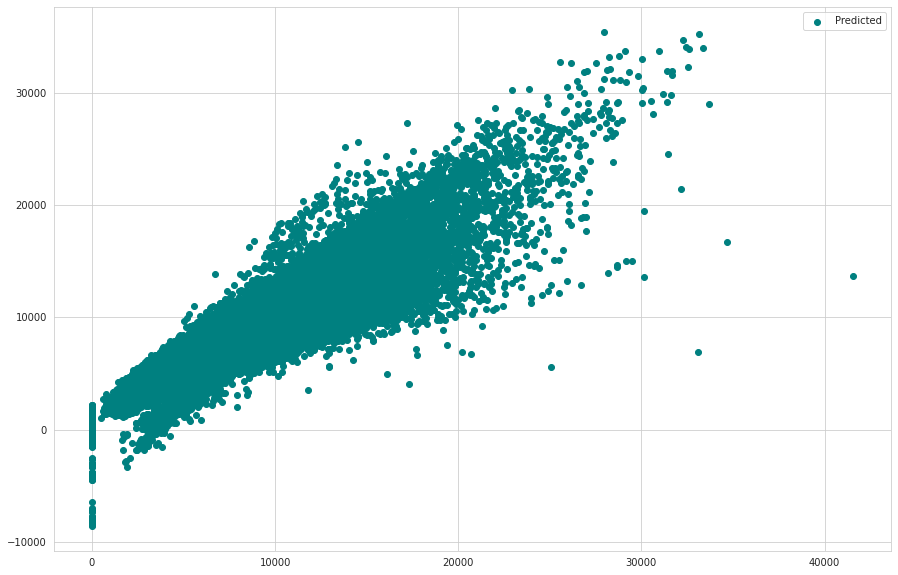

In [ ]:
lr = []
lr = values_cal(regressor, y_pred_train_LR,y_pred_test_LR)

In [ ]:
#visualising our predictions
# sns.lmplot(x='Sales', y='PredictedLR', data=dataset, line_kws={'color': 'black'})

In [ ]:
X = sm.add_constant(df_dummy) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.390e+33
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:35:02   Log-Likelihood:             2.4311e+07
No. Observations:             1017209   AIC:                        -4.862e+07
Df Residuals:                 1017188   BIC:                        -4.862e+07
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.501e-11   6.77e-14    221.797      0.000    1.49e-11    1.51e-11
Store                -3.27e-15   3.12e-17   -104.730      0.000   -3.33e-15   -3.21e-15
Sales                   1.0000   8.32e-18    1.2e+17      0.000       1.000       1.000
Customers            3.447e-16   6.86e-17      5.023      0.000     2.1e-16    4.79e-16
Open                 7.803e-13   6.21e-14     12.563      0.000    6.59e-13    9.02e-13
Promo                8.988e-13   2.64e-14     34.060      0.000    8.47e-13    9.51e-13
SchoolHoliday       -5.507e-14   2.75e-14     -1.999      0.046   -1.09e-13   -1.08e-15
CompetitionDistance  1.379e-16   1.37e-18    100.928      0.000    1.35e-16    1.41e-16
Promo2              -2.247e-12   2.09e-14   -107.643      0.000   -2.29e-12   -2.21e-12
DayOfYear            4.358e-15   9.95e-17     43.794      0.000    4.16e-15    4.55e-15
DayOfWeek_2         -6.253e-13   3.78e-14    -16.521      0.000   -6.99e-13   -5.51e-13
DayOfWeek_3         -1.268e-12    3.8e-14    -33.352      0.000   -1.34e-12   -1.19e-12
DayOfWeek_4         -9.619e-13   3.81e-14    -25.275      0.000   -1.04e-12   -8.87e-13
DayOfWeek_5         -1.094e-13   3.78e-14     -2.891      0.004   -1.84e-13   -3.52e-14
DayOfWeek_6         -4.077e-13   4.05e-14    -10.059      0.000   -4.87e-13   -3.28e-13
DayOfWeek_7          3.046e-13   6.56e-14      4.645      0.000    1.76e-13    4.33e-13
StoreType_1         -1.781e-12   1.26e-13    -14.117      0.000   -2.03e-12   -1.53e-12
StoreType_2          6.713e-13   3.07e-14     21.840      0.000    6.11e-13    7.32e-13
StoreType_3         -3.664e-13   2.52e-14    -14.561      0.000   -4.16e-13   -3.17e-13
Assortment_1        -3.813e-13   1.65e-13     -2.316      0.021   -7.04e-13   -5.86e-14
Assortment_2        -7.661e-13   2.12e-14    -36.206      0.000   -8.08e-13   -7.25e-13
==============================================================================
Omnibus:                    50150.016   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106037.868
Skew:                           0.341   Prob(JB):                         0.00
Kurtosis:                       4.427   Cond. No.                     1.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## <font color = "sky blue">**2. LARS Lasso Regression**

In [ ]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

In [ ]:
#check the score
las.score(X_train, y_train)

0.9020503656505221

In [ ]:
#get the X_train and X-test value
y_pred_train_las = las.predict(X_train)
y_pred_test_las = las.predict(X_test)

Score: 90.21

Train MSE: 1453996.6723355732
Test MSE: 1469777.2595391355

Train RMSE: 1205.8178437623044
Test RMSE: 1212.3437052004417

Train MAPE: 3.972281456530555e+17
Test MAPE: 3.937887040538483e+17

Train R2: 0.9020503656505221
Test R2: 0.9020503656505221

Train Adjusted R2: 0.9021346188627969
Test Adjusted R2: 0.9003179406860677



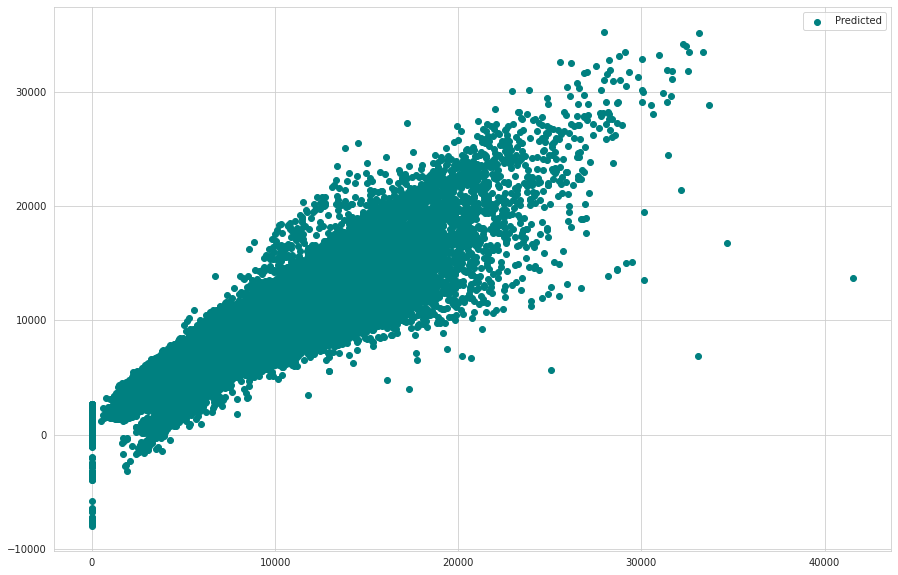

In [ ]:
lars = []
lars = values_cal(las,y_pred_train_las,y_pred_test_las)

## <font color = "sky blue"> **3. Ridge Regression**

In [ ]:
ridge= Ridge(alpha=0.01)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.9027034878932301

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

Score: 90.27

Train MSE: 1444301.510390022
Test MSE: 1460793.70889884

Train RMSE: 1201.7909595225044
Test RMSE: 1208.6329918129986

Train MAPE: 3.9729068449356525e+17
Test MAPE: 3.955118657074857e+17

Train R2: 0.9027034878932301
Test R2: 0.9027034878932301

Train Adjusted R2: 0.9027878021083591
Test Adjusted R2: 0.9009277867716562



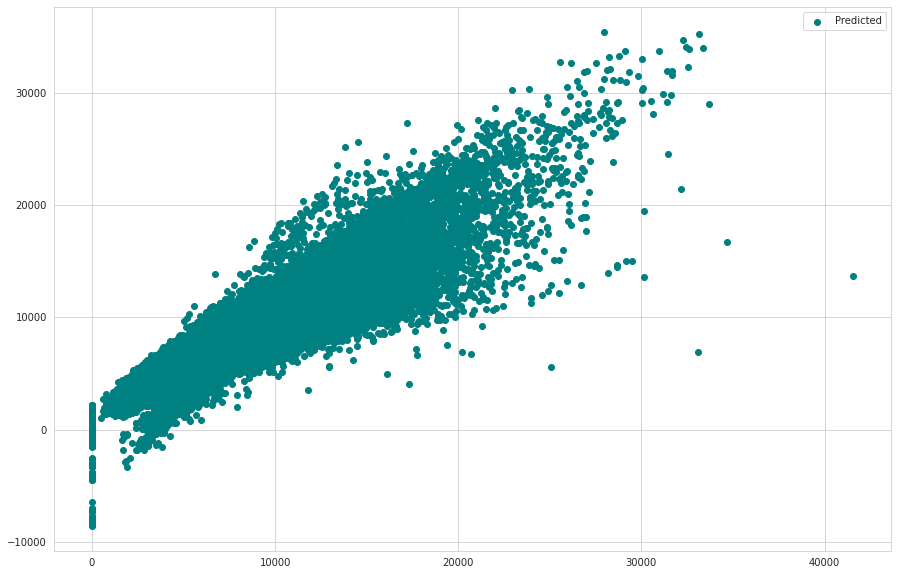

In [ ]:
ridgeR = []
ridgeR = values_cal(ridge, y_pred_train_ridge,y_pred_test_ridge)

## <font color = "sky blue">**4. Decision Tree Regression**

In [ ]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

###<font color = "sky blue">**Hyperparameter tuning**

In [ ]:
# # #another script that takes toooo long, to find the right parameters for tree
# tree = DecisionTreeRegressor()
# rfr = RandomForestRegressor(n_jobs=-1)
# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV( estimator = rfr, param_distributions = params, verbose = True, cv = 10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

# grid.fit(X_train, y_train)
# grid.best_params_

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [ ]:

train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_pred_train_tree = treereg.predict(X_train)
y_pred_test_tree = treereg.predict(X_test)


Regresion Model Score : 0.987199679988164 , Test Score : 0.9773385263865326


Score: 98.72

Train MSE: 190012.17131280797
Test MSE: 333853.92708996276

Train RMSE: 435.90385558378347
Test RMSE: 577.8009407139822

Train MAPE: 3068056388897.0
Test MAPE: 3259676198279.1914

Train R2: 0.987199679988164
Test R2: 0.987199679988164

Train Adjusted R2: 0.9872918863076368
Test Adjusted R2: 0.9774298116555858



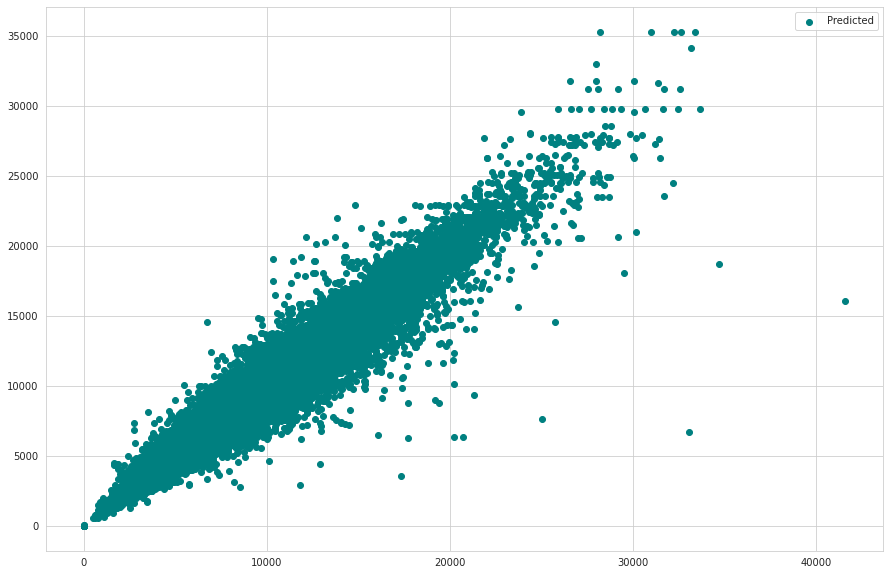

In [ ]:
Dtree = []
Dtree = values_cal(tree, y_pred_train_tree,y_pred_test_tree)

## <font color = "sky blue">**5. K-Nearest Neighbors Regression**

In [ ]:
X_train.shape[0],y_train.shape[0]

(813767, 813767)

In [ ]:
X_t = X_train.iloc[0:100000]
y_t = y_train.iloc[0:100000]

In [ ]:
X_te = pd.DataFrame(X_test[0:20000])
y_te = y_test.iloc[0:20000]


In [ ]:
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_t, y_t)

In [ ]:
# #another script that takes toooo long, to find the right parameters for knn.
# print("Regresion Model Score" , ":" , knnreg.score(X_t, y_t) , "," ,
#       "Out of Sample Test Score" ,":" , knnreg.score(X_te, y_te))

y_pred_train_knn = knnreg.predict(X_t)
y_pred_test_knn = knnreg.predict(X_te)


image.png

Score: 72.6

Train MSE: 4059325.0600378667
Test MSE: 4599269.414858555

Train RMSE: 2014.7766774602753
Test RMSE: 2144.5907336502587

Train MAPE: 9.940730005180312e+16
Test MAPE: 1.0391316048618656e+17

Train R2: 0.7260010939025536
Test R2: 0.7260010939025536

Train Adjusted R2: 0.7266914853331916
Test Adjusted R2: 0.6960317802265907



<Figure size 1080x720 with 0 Axes>

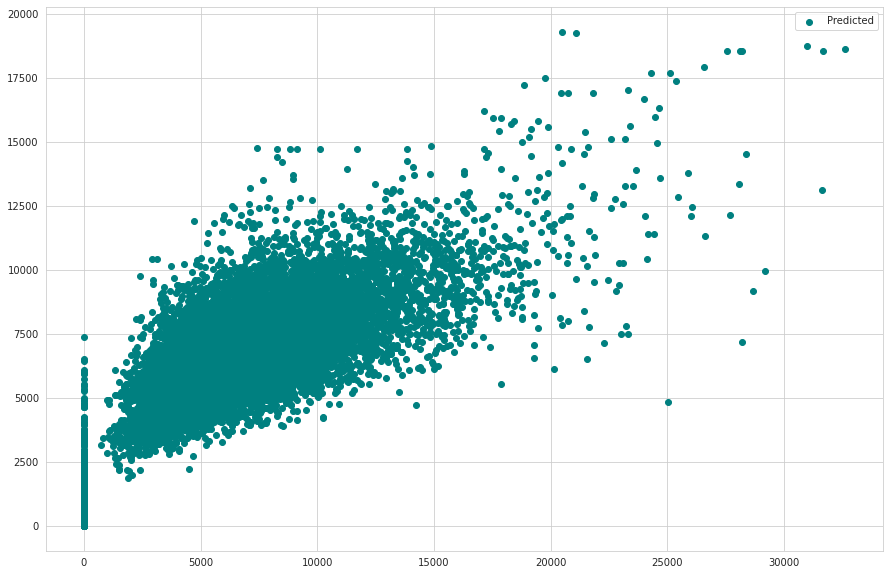

In [ ]:
l1 = list()

#calculate score
score = knn.score(X_t, y_t)
print(f'Score: {round(score*100,2)}\n')
l1.append(score)

#calculate MSE
#train
MSE_t= mean_squared_error(y_t, y_pred_train_knn)
print("Train MSE:",MSE_t)
l1.append(MSE_t)

#test
MSE_te= mean_squared_error(y_te, y_pred_test_knn)
print("Test MSE:",MSE_te)
l1.append(MSE_te)

#calculate RMSE
#Train
RMSE_t=np.sqrt(MSE_t)
print("\nTrain RMSE:",RMSE_t)
l1.append(RMSE_t)
      
#test
RMSE_te=np.sqrt(MSE_te)
print("Test RMSE:",RMSE_te)
l1.append(RMSE_te)

#calculate MAE
#train
MAE_t= mean_absolute_percentage_error(y_t, y_pred_train_knn)
print("\nTrain MAPE:",MAE_t)
l1.append(MAE_t)

#test
MAE_te= mean_absolute_percentage_error(y_te, y_pred_test_knn)
print("Test MAPE:",MAE_te)
l1.append(MAE_te)

#calculate r2 and adjusted r2
#train
r2_t= r2_score(y_t, y_pred_train_knn)
print("\nTrain R2:",r2_t)
l1.append(r2_t)

#test
r2_te= r2_score(y_te, y_pred_test_knn)
print(f"Test R2:",r2_t)
l1.append(r2_te)

rows = X_te.shape[0]
cols = X_te.shape[1]

#train
Adjusted_R2_t = (1 - (1 - r2_t * ((rows - 1) / (rows - cols - 1))))
print(f"\nTrain Adjusted R2:",Adjusted_R2_t)
l1.append(Adjusted_R2_t)

#test
Adjusted_R2_te = (1 - (1 - r2_te * ((rows - 1) / (rows - cols - 1))))
print(f"Test Adjusted R2: {Adjusted_R2_te}\n")
l1.append(Adjusted_R2_te)

#Plot the figure
plt.figure(figsize=(15,10))
plt.scatter(y_te,np.array(y_pred_test_knn), color = "Teal")
# plt.plot(y_test,(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

k_nn = []
k_nn = [round(value, 4) for value in l1]

## <font color = "sky blue">**6. Random Forest**

In [ ]:

# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, criterion='squared_error',random_state=1)

rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=1)

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

Score: 99.78

Train MSE: 32744.83347357806
Test MSE: 229600.00349917318

Train RMSE: 180.95533557642906
Test RMSE: 479.1659456797542

Train MAPE: 5091520861.860972
Test MAPE: 0.04326888237917203

Train R2: 0.9977941184277819
Test R2: 0.9977941184277819

Train Adjusted R2: 0.9978873142878665
Test Adjusted R2: 0.9845070631516579



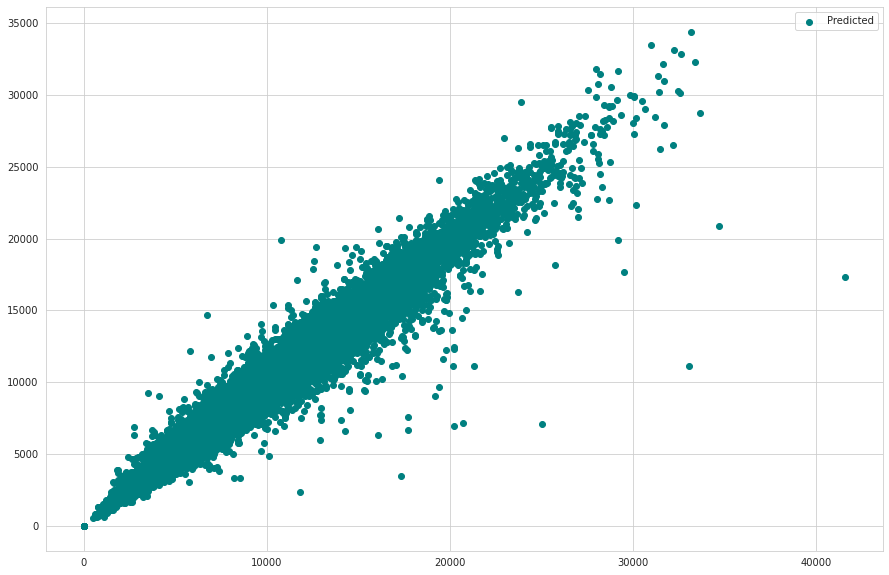

In [ ]:
rf = []
rf = values_cal(rf_model, y_pred_train_r,y_pred_test_r)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.666966,0.095966,1.0,0.0,0.0,0.0,0.017801,1.0,0.189560,0.196078,0.181818,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.035907,0.047780,1.0,1.0,1.0,0.0,0.015295,1.0,0.181319,0.176471,0.181818,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.336625,0.118977,1.0,0.0,0.0,1.0,0.001846,0.0,0.521978,0.529412,0.545455,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833034,0.074039,1.0,0.0,0.0,0.0,0.063291,0.0,0.239011,0.235294,0.181818,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.729803,0.067948,1.0,0.0,1.0,0.0,0.323180,0.0,0.505495,0.509804,0.545455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
col_names = df_dummy.columns

In [ ]:
old_names = X_train.columns

# Create a list of new column names
new_names = df_dummy.columns

# Create a dictionary mapping old names to new names
name_mapping = dict(zip(old_names, new_names))

# Change the column names using the rename method
X = X_train.rename(columns=name_mapping)

In [ ]:
X.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,DayOfYear,WeekOfYear,Month,Year,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_1,StoreType_2,StoreType_3,Assortment_1
0,0.666966,0.095966,1.0,0.0,0.0,0.0,0.017801,1.0,0.189560,0.196078,0.181818,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.035907,0.047780,1.0,1.0,1.0,0.0,0.015295,1.0,0.181319,0.176471,0.181818,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.336625,0.118977,1.0,0.0,0.0,1.0,0.001846,0.0,0.521978,0.529412,0.545455,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833034,0.074039,1.0,0.0,0.0,0.0,0.063291,0.0,0.239011,0.235294,0.181818,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.729803,0.067948,1.0,0.0,1.0,0.0,0.323180,0.0,0.505495,0.509804,0.545455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
rf_model.feature_importances_

array([2.40294116e-02, 8.62191026e-01, 0.00000000e+00, 1.74597431e-02,
       1.52926573e-02, 5.68534313e-04, 3.43319937e-02, 4.33886501e-03,
       3.72459571e-03, 1.91751955e-03, 9.33894382e-04, 1.90663023e-03,
       5.51089882e-04, 4.60808105e-04, 6.42720257e-04, 8.91800490e-04,
       1.05149235e-03, 1.70013404e-04, 6.39457159e-03, 9.15842824e-04,
       9.51496104e-03, 9.96677632e-03, 2.74505267e-03])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Sales,0.86
6,SchoolHoliday,0.03
0,Store,0.02
3,Open,0.02
4,Promo,0.02
21,StoreType_3,0.01
20,StoreType_2,0.01
18,DayOfWeek_7,0.01
14,DayOfWeek_3,0.00
19,StoreType_1,0.00


<Figure size 720x1440 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 23 artists>

([<matplotlib.axis.YTick at 0x7f567f4c5160>,
 [Text(0, 0, 'Customers'),
  Text(0, 0, 'DayOfWeek_6'),
  Text(0, 0, 'DayOfWeek_2'),
  Text(0, 0, 'Year'),
  Text(0, 0, 'StateHoliday'),
  Text(0, 0, 'DayOfWeek_3'),
  Text(0, 0, 'DayOfWeek_4'),
  Text(0, 0, 'StoreType_1'),
  Text(0, 0, 'WeekOfYear'),
  Text(0, 0, 'DayOfWeek_5'),
  Text(0, 0, 'Month'),
  Text(0, 0, 'DayOfYear'),
  Text(0, 0, 'Assortment_1'),
  Text(0, 0, 'Promo2'),
  Text(0, 0, 'CompetitionDistance'),
  Text(0, 0, 'DayOfWeek_7'),
  Text(0, 0, 'StoreType_2'),
  Text(0, 0, 'StoreType_3'),
  Text(0, 0, 'Promo'),
  Text(0, 0, 'Open'),
  Text(0, 0, 'Store'),
  Text(0, 0, 'SchoolHoliday'),
  Text(0, 0, 'Sales')])

Text(0.5, 0, 'Relative Importance')

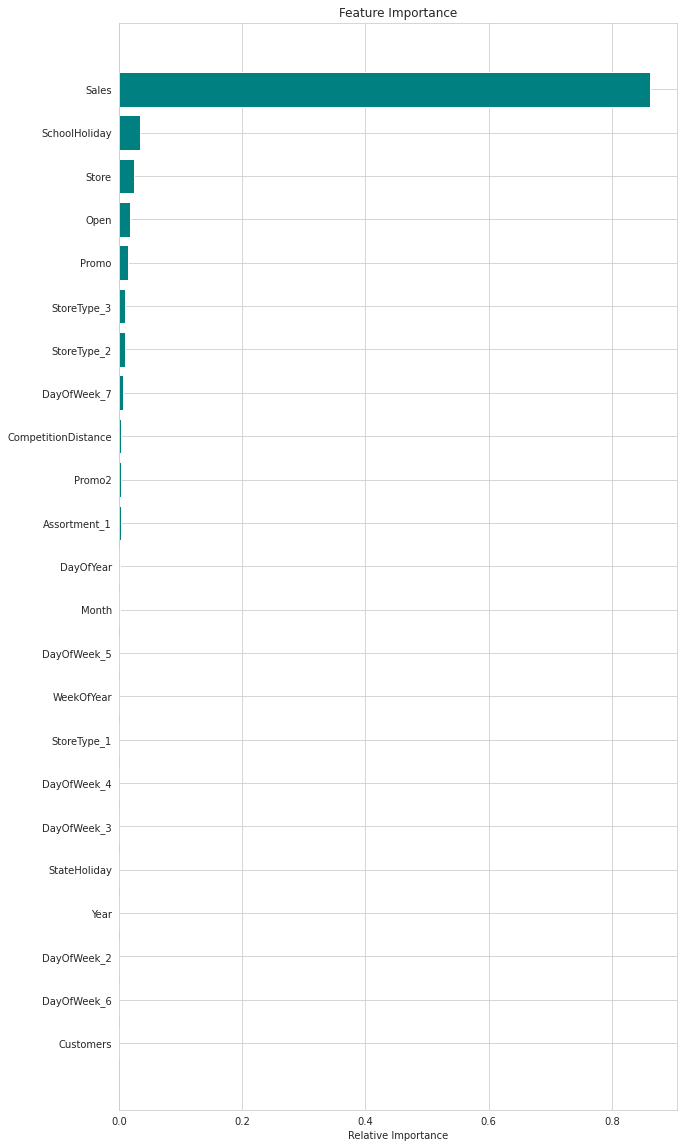

In [ ]:
# Random forest
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='Teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

##<font color = "sky blue"> **7. XGBoost**

In [ ]:

xgb = XGBRegressor(n_estimators=50, criterion='squared_error',random_state=1)

xgb.fit(X_train,y_train)

[14:50:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(criterion='squared_error', n_estimators=50, random_state=1)

In [ ]:
X_test = pd.DataFrame(X_test)

In [ ]:
# Making predictions on train and test data
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

Score: 92.27

Train MSE: 1147716.426584182
Test MSE: 1164175.3010291695

Train RMSE: 1071.3152787971346
Test RMSE: 1078.9695551910486

Train MAPE: 1.1149464387599122e+17
Test MAPE: 1.1025178733283864e+17

Train R2: 0.9226831763375146
Test R2: 0.9226831763375146

Train Adjusted R2: 0.9227693566933779
Test Adjusted R2: 0.9210636531117846



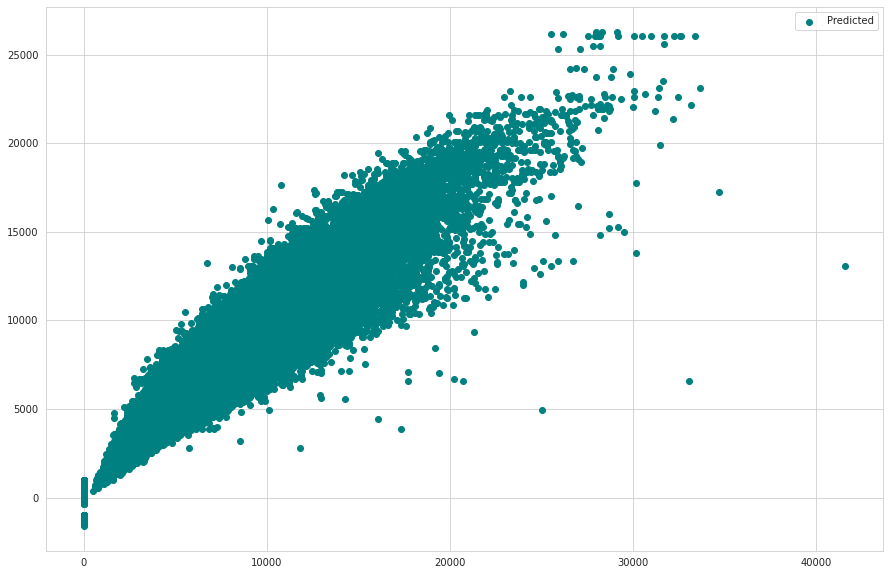

In [ ]:
xgboost = []
xgboost = values_cal(xgb, y_pred_train_xgb,y_pred_test_xgb)

<Figure size 720x1440 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 19 artists>

([<matplotlib.axis.YTick at 0x7f5675093b50>,
 [Text(0, 0, 'DayOfYear'),
  Text(0, 0, 'DayOfWeek_7'),
  Text(0, 0, 'Sales'),
  Text(0, 0, 'DayOfWeek_5'),
  Text(0, 0, 'Open'),
  Text(0, 0, 'Promo2'),
  Text(0, 0, 'const'),
  Text(0, 0, 'DayOfWeek_4'),
  Text(0, 0, 'SchoolHoliday'),
  Text(0, 0, 'DayOfWeek_2'),
  Text(0, 0, 'CompetitionDistance'),
  Text(0, 0, 'DayOfWeek_6'),
  Text(0, 0, 'StoreType_3'),
  Text(0, 0, 'DayOfWeek_3'),
  Text(0, 0, 'Promo'),
  Text(0, 0, 'StoreType_2'),
  Text(0, 0, 'StoreType_1'),
  Text(0, 0, 'Customers'),
  Text(0, 0, 'Store')])

Text(0.5, 0, 'Relative Importance')

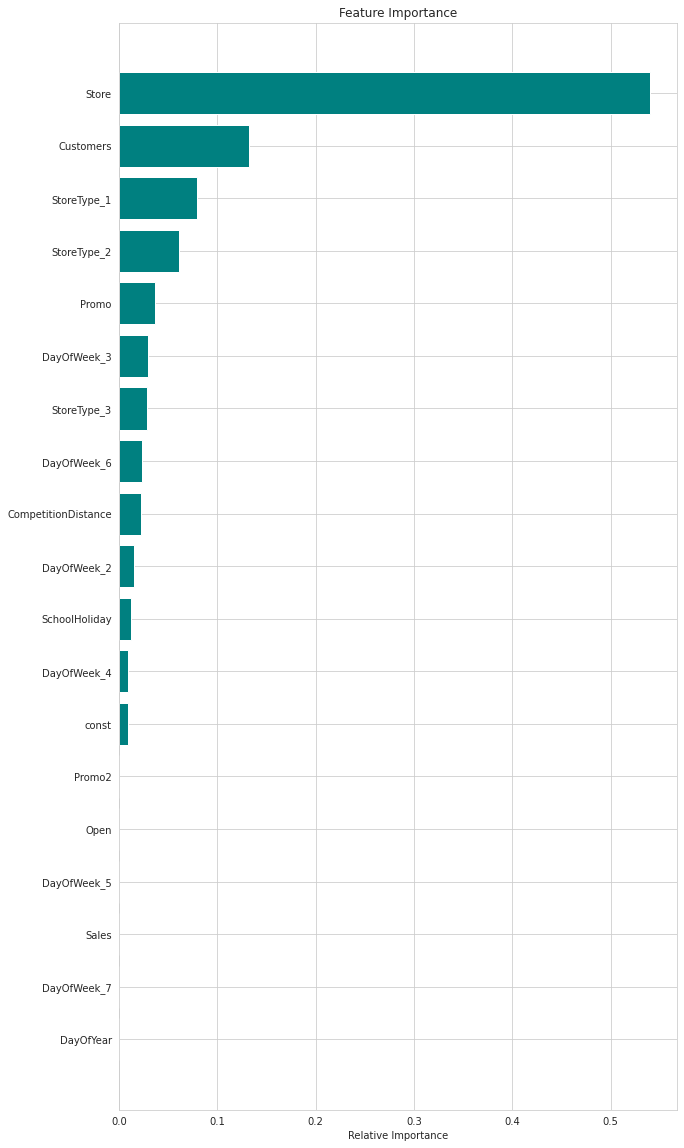

In [ ]:
features = X.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='Teal', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

## **Result**

In [ ]:
df_result = pd.DataFrame(columns = ['Modal Name','Score','Train MSE','Test MSE','Train RMSE','Test RMSE','Train MAPE','Test MAPE','Train R2','Test R2','Train Adjusted R2','Test Adjusted R2'])

In [ ]:
lr.insert(0,'Linear Regression')
lars.insert(0,'LARS Lasso')
ridgeR.insert(0, 'Ridge')
Dtree.insert(0,'Desision Tree')
k_nn.insert(0, 'K-Nearest')
rf.insert(0,'Random Forest')
xgboost.insert(0,'XGBoost')

In [ ]:
modals = [lr,lars,ridgeR,Dtree,k_nn,rf,xgboost]

for i,j in zip(modals,range(7)):

  df_result.loc[j] = i

In [ ]:
df_result

,Modal Name,Score,Train MSE,Test MSE,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2


# Conclusion:-

In [ ]:
t2 = time.time()
print(f"Execution time = {round((t2-t1)/60,2)} mins" )

Execution time = 60.99 mins
